In [2]:
from WindPy import *
w.start()
w.isconnected()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2021 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [12]:
#! pip install seaborn

In [7]:
from datetime import date
today_for_api  = str(date.today())
import pandas as pd
import numpy as np

In [6]:
#######图形模版
import seaborn as sns
cm=sns.color_palette("Spectral", as_cmap=True)
#cm = sns.light_palette("Spectral", as_cmap=True)
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")
font = ['Songti SC']
parameters = {'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          "font.family" : "sans-serif",
          "font.sans-serif":font,
          'font.size':15,
          "axes.unicode_minus":False}
plt.rcParams.update(parameters)



/var/folders/bg/h2_d2l2939102wvpkt70y0_00000gn/T/ipykernel_1396/1267685721.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


In [15]:
error,dp_0 =w.wsd("000300.SH","CLOSE", "2000-01-01", today_for_api, "PriceAdj=F",usedf=True)
dp_0.index =pd.to_datetime(dp_0.index ,infer_datetime_format=True)
dp_0 =dp_0.resample("M").ffill()
dp_0.index = dp_0.index.to_period("M")
data_macro=pd.DataFrame(index = dp_0.index,columns =["dp","dy","ep","de","svar","bm","ntis","tbl","ity","itr","tms","dfy","infl"])


Dividend Price Ratio dp

               dp   dy   ep   de svar   bm ntis  tbl  ity  itr  tms  dfy infl
2000-01       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000-02       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000-03       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000-04       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000-05       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2022-07  0.741413  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2022-08  0.741413  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2022-09  1.025217  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2022-10  1.057443  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2022-11       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[275 rows x 13 columns]


<AxesSubplot: >

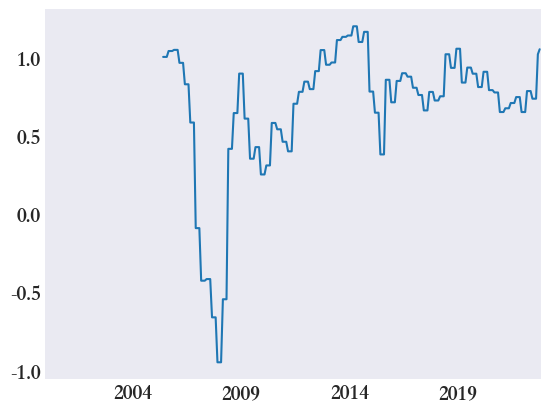

In [16]:
error,dp_1 =w.wsd("000300.SH", "dividendyield2", "2000-01-01", "2022-10-26", "rptYear=2020;Period=Q",usedf=True)
dp_1.index =pd.to_datetime(dp_1.index ,infer_datetime_format=True)
dp_1 =dp_1.resample("M").ffill()
dp_1.index = dp_1.index.to_period("M")

data_macro["dp"] = np.log(dp_1)
print(data_macro)

data_macro["dp"].plot()


Dividend Yield

               dp        dy   ep   de svar   bm ntis  tbl  ity  itr  tms  dfy  \
2000-01       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2000-02       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2000-03       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2000-04       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2000-05       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...           ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2022-07  0.741413  0.530073  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-08  0.741413  0.570848  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-09  1.025217  0.778960  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-10  1.057443  0.728616  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-11       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        infl  
2000-01  NaN

<AxesSubplot: >

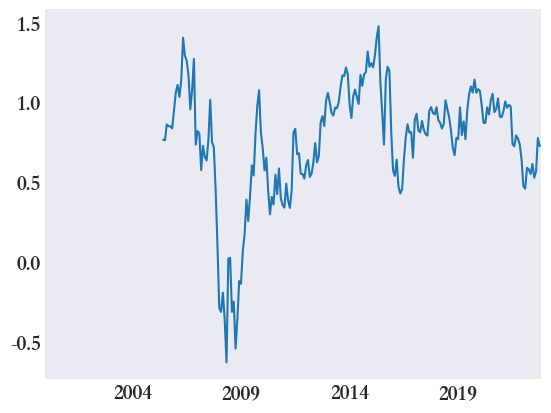

In [17]:
error,dp_close =w.wsd("000300.SH","close", "2000-01-01", today_for_api, "PriceAdj=F",usedf=True)
dp_close.index =pd.to_datetime(dp_close.index ,infer_datetime_format=True)
dr = dp_close/dp_close.shift(252)

dr =dr.resample("M").last()
dr.index = dr.index.to_period("M")


dp_2 = dr["CLOSE"]*dp_1["DIVIDENDYIELD2"]

#dp_2.dropna().plot()

data_macro["dy"]=np.log(dp_2)
print(data_macro)
data_macro["dy"].plot()

In [18]:
#沪深300指数	滚动市盈率(TTM):沪深300	滚动市盈率(TTM):中证500	市净率:沪深300	沪深股市:筹资金额:A股增发:当月值	上证所:A股市价总值	中债国债到期收益率:3个月	中债国债到期收益率:10年	公司债到期收益率(AAA):3年	公司债到期收益率(AA):3年	CPI:当月同比
#M0020209	M0342074	Z9897715	M0342075	M0024248	M6093018	S0059741	S0059749	M1003840	M1003860	M0000612


earnings price ratio

               dp        dy        ep   de svar   bm ntis  tbl  ity  itr  tms  \
2000-01       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2000-02       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2000-03       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2000-04       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2000-05       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...           ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
2022-07  0.741413  0.530073 -2.492627  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-08  0.741413  0.570848 -2.466564  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-09  1.025217  0.778960 -2.415324  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-10  1.057443  0.728616 -2.330920  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2022-11       NaN       NaN -2.379518  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

         dfy infl  
2000-01

<AxesSubplot: >

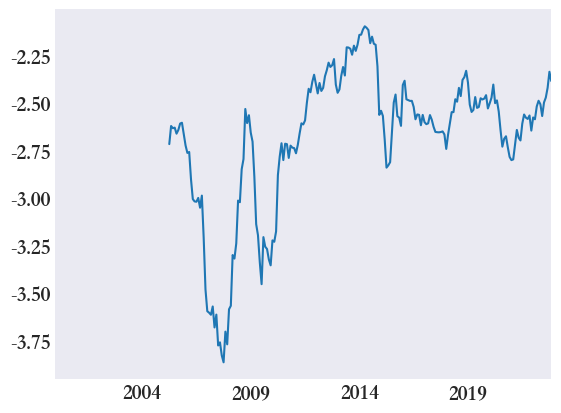

In [19]:

error,df_pe=w.edb("M0342074,Z9897715", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_pe.index =pd.to_datetime(df_pe.index ,infer_datetime_format=True)

df_pe =df_pe.resample("M").last()
df_pe.index = df_pe.index.to_period("M")
dp_3=1/df_pe
#dp_3.plot()
data_macro["ep"]=np.log(dp_3["M0342074"])
print(data_macro)

data_macro["ep"].plot()

Dividend Payout Ratio

<AxesSubplot: >

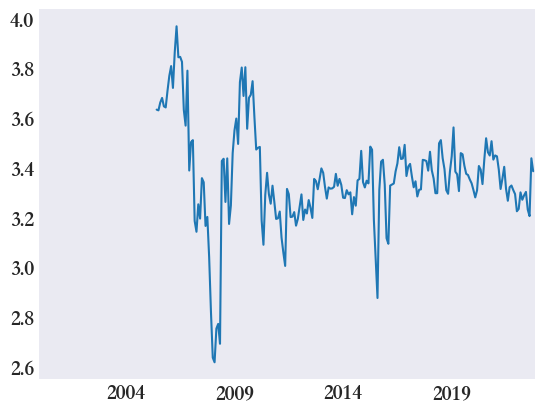

In [20]:
#dp_4=np.log(dp_1["DIVIDENDYIELD2"])-np.log(dp_3["M0342074"])
#data_macro.append(np.log(dp_4))

data_macro["de"] = data_macro["dp"]-data_macro["ep"]
data_macro["de"].plot()



Stock Variance 

<AxesSubplot: >

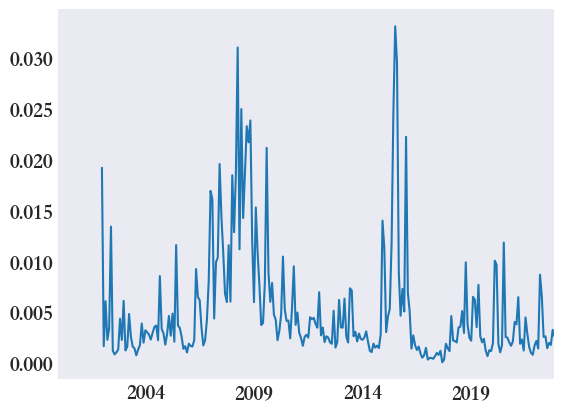

In [21]:
error,df_close=w.edb("M0020209", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_close.index =pd.to_datetime(df_close.index)
dr = df_close/df_close.shift(1)-1
dp_stock_var = dr**2

dp_stock_var =dp_stock_var.resample("M").sum()
dp_stock_var.index = dp_stock_var.index.to_period("M")


data_macro["svar"] =dp_stock_var
data_macro["svar"].plot()

Book_to_Market Ratio M0342075

<AxesSubplot: >

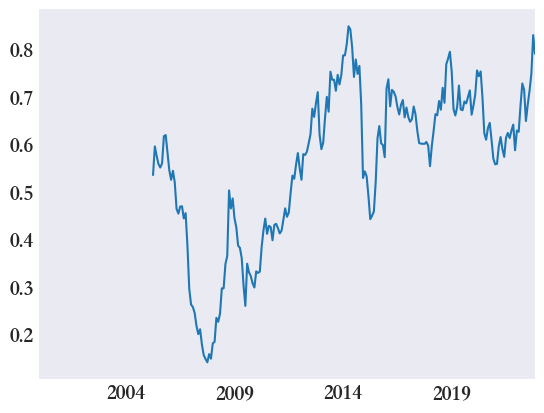

In [22]:
error,df_BM=w.edb("M0342075", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_BM.index =pd.to_datetime(df_BM.index)



df_BM =df_BM.resample("M").last()
df_BM.index = df_BM.index.to_period("M")


data_macro["bm"] =1/df_BM
data_macro["bm"].plot()




Net Equity Expansion 

               dp        dy        ep        de      svar        bm      ntis  \
2000-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-04       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-05       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
2022-07  0.741413  0.530073 -2.492627  3.234040  0.001537  0.684229  0.017247   
2022-08  0.741413  0.570848 -2.466564  3.207978  0.002056  0.713369  0.018812   
2022-09  1.025217  0.778960 -2.415324  3.440541  0.001862  0.749232  0.019040   
2022-10  1.057443  0.728616 -2.330920  3.388363  0.003342  0.830496  0.019470   
2022-11       NaN       NaN -2.379518       NaN  0.002698  0.791077       NaN   

         tbl  ity  itr  tms

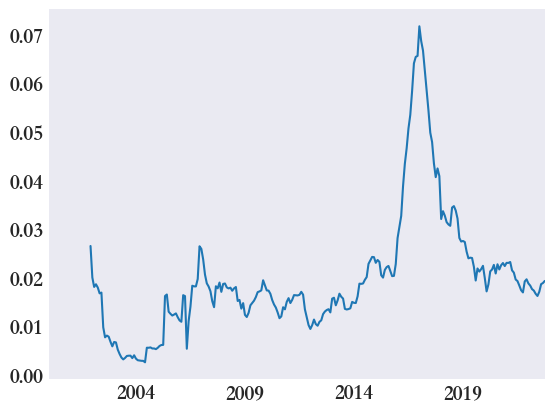

In [23]:
##net equity expansion 
error,data_stock=w.edb("M0024248,M6093018", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
__data_stock=data_stock.rolling(window=12).mean()
__data_stock.index =pd.to_datetime(__data_stock.index)
dp_7 =__data_stock["M0024248"]*12/__data_stock["M6093018"]
dp_7.plot()


dp_7 =dp_7.resample("M").last()
dp_7.index = dp_7.index.to_period("M")
data_macro["ntis"]=dp_7
print(data_macro)

Treasury Bills

               dp        dy        ep        de      svar        bm      ntis  \
2000-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-04       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-05       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
2022-07  0.741413  0.530073 -2.492627  3.234040  0.001537  0.684229  0.017247   
2022-08  0.741413  0.570848 -2.466564  3.207978  0.002056  0.713369  0.018812   
2022-09  1.025217  0.778960 -2.415324  3.440541  0.001862  0.749232  0.019040   
2022-10  1.057443  0.728616 -2.330920  3.388363  0.003342  0.830496  0.019470   
2022-11       NaN       NaN -2.379518       NaN  0.002698  0.791077       NaN   

              tbl       ity

<AxesSubplot: >

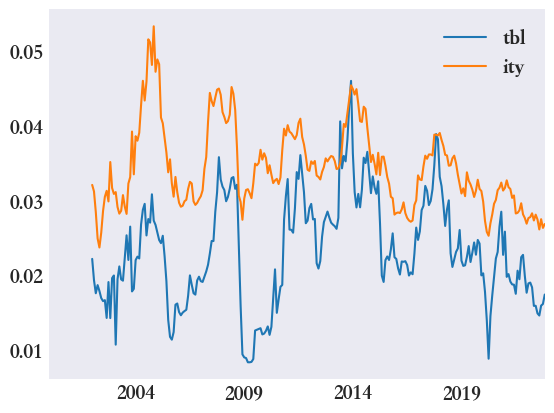

In [24]:
##Treasury Bills
error,df_89=w.edb("S0059741,S0059749", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_89.index =pd.to_datetime(df_89.index ,infer_datetime_format=True)
#df_89.plot()

df_89 =df_89.resample("M").last()
df_89.index = df_89.index.to_period("M")


data_macro[["tbl","ity"]]= df_89/100
print(data_macro)
data_macro[["tbl","ity"]].plot()

<AxesSubplot: >

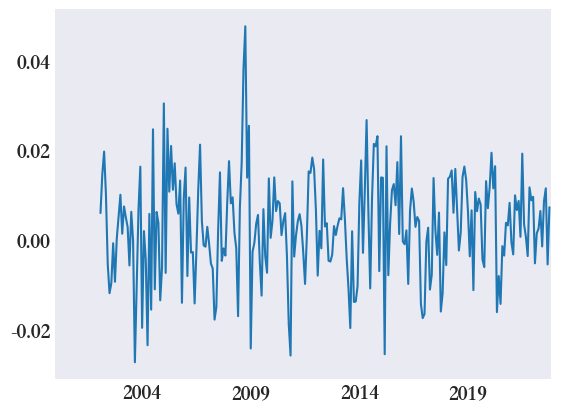

In [25]:
error,df_close_bond = w.wsd("CBA00351.CS", "close", "2000-01-01", "2022-10-26", usedf=True)
df_close_bond.index =pd.to_datetime(df_close_bond.index,infer_datetime_format=True)
df_bond_close_month=df_close_bond.resample("M").last()
dp_10 = df_bond_close_month/df_bond_close_month.shift(1)-1
#dp_10.plot()



#df_10 =df_10.resample("M").last()
dp_10.index = dp_10.index.to_period("M")


data_macro["itr"]= dp_10
data_macro["itr"].plot()

<AxesSubplot: >

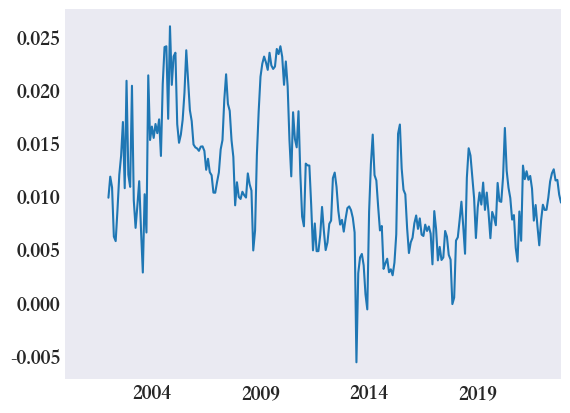

In [26]:
# error,df_89_11_12_13=w.edb("S0059741,S0059749,M1003840,M1003860,M0000612", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
# df_89_1113.index =pd.to_datetime(df_89_1113.index ,infer_datetime_format=True)
data_macro["tms"] = data_macro["ity"] -data_macro["tbl"]

data_macro["tms"].plot()

               dp        dy        ep        de      svar        bm      ntis  \
2000-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-04       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-05       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
2022-07  0.741413  0.530073 -2.492627  3.234040  0.001537  0.684229  0.017247   
2022-08  0.741413  0.570848 -2.466564  3.207978  0.002056  0.713369  0.018812   
2022-09  1.025217  0.778960 -2.415324  3.440541  0.001862  0.749232  0.019040   
2022-10  1.057443  0.728616 -2.330920  3.388363  0.003342  0.830496  0.019470   
2022-11       NaN       NaN -2.379518       NaN  0.002698  0.791077       NaN   

              tbl       ity

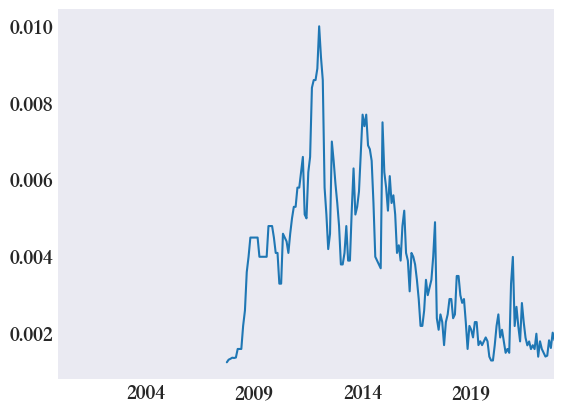

In [27]:
error,df_11_12=w.edb("M1000396,M1000370", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_11_12.index =pd.to_datetime(df_11_12.index ,infer_datetime_format=True)



df_11_12_month=df_11_12.resample("M").last()





#df_10 =df_10.resample("M").last()
df_11_12_month.index = df_11_12_month.index.to_period("M")

data_macro["dfy"]= (df_11_12_month["M1000396"]-df_11_12_month["M1000370"])/100
data_macro["dfy"].plot()
print(data_macro)



<AxesSubplot: >

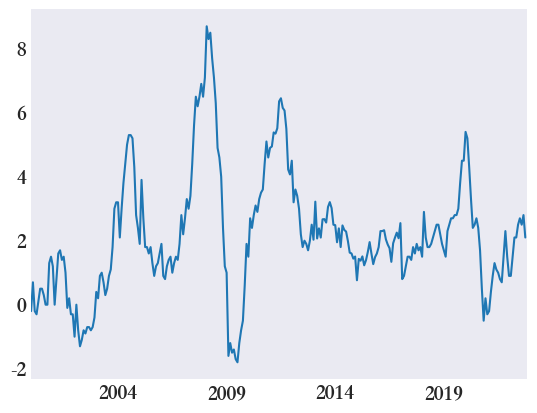

In [28]:
error,df_13=w.edb("M0000612", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_13.index =pd.to_datetime(df_13.index ,infer_datetime_format=True)




df_13_month=df_13.resample("M").last()

#df_13_month.plot()



#df_10 =df_10.resample("M").last()
df_13_month.index = df_13_month.index.to_period("M")

data_macro["infl"]= df_13_month

#print(data_macro)
data_macro["infl"].plot()


In [29]:
#data_macro.mean()

def value_tran_zscore(data):
    data_mean =data.mean()
    data_std = data.std()
    zscore= (data.values[-1]-data_mean)/data_std
    return zscore


In [30]:
data_zscore = data_macro

data_zscore= data_macro.dropna().rolling(window =3*12).apply(value_tran_zscore)

<AxesSubplot: >

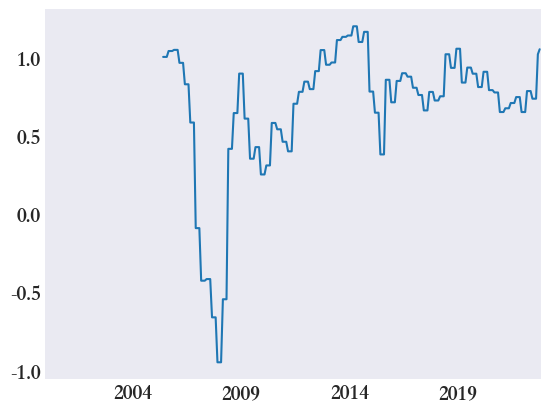

In [31]:
data_macro["dp"].plot()

<AxesSubplot: >

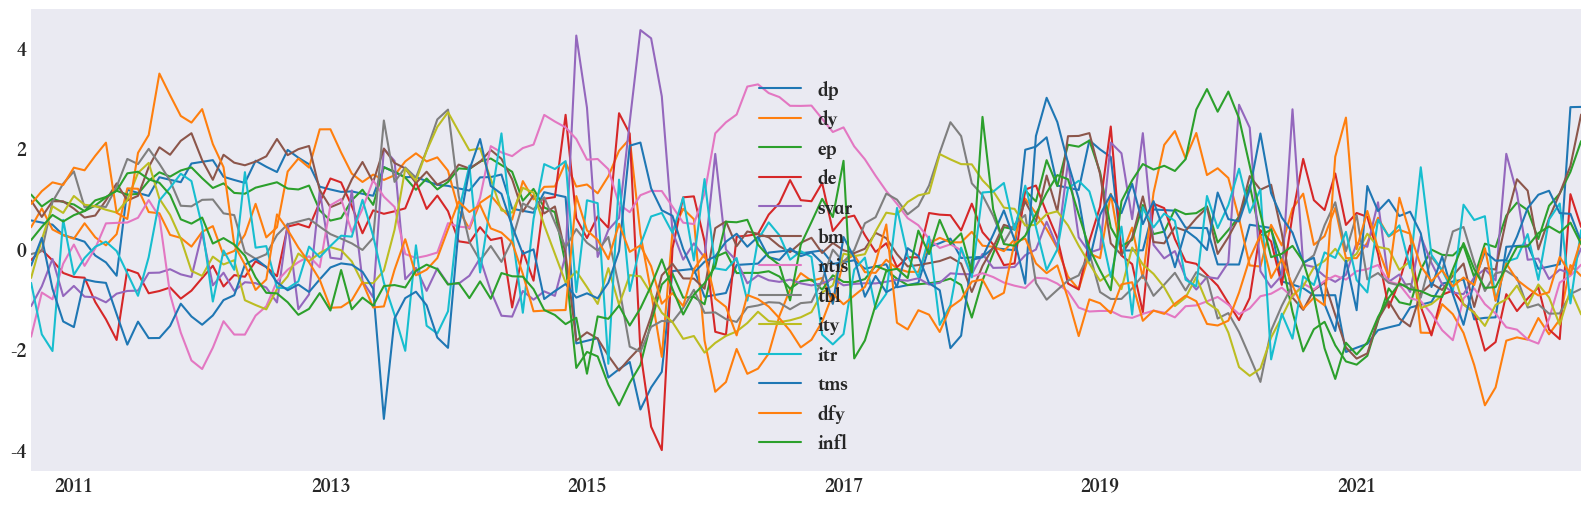

In [344]:
data_zscore.dropna().plot(figsize=(20,6))


<AxesSubplot: >

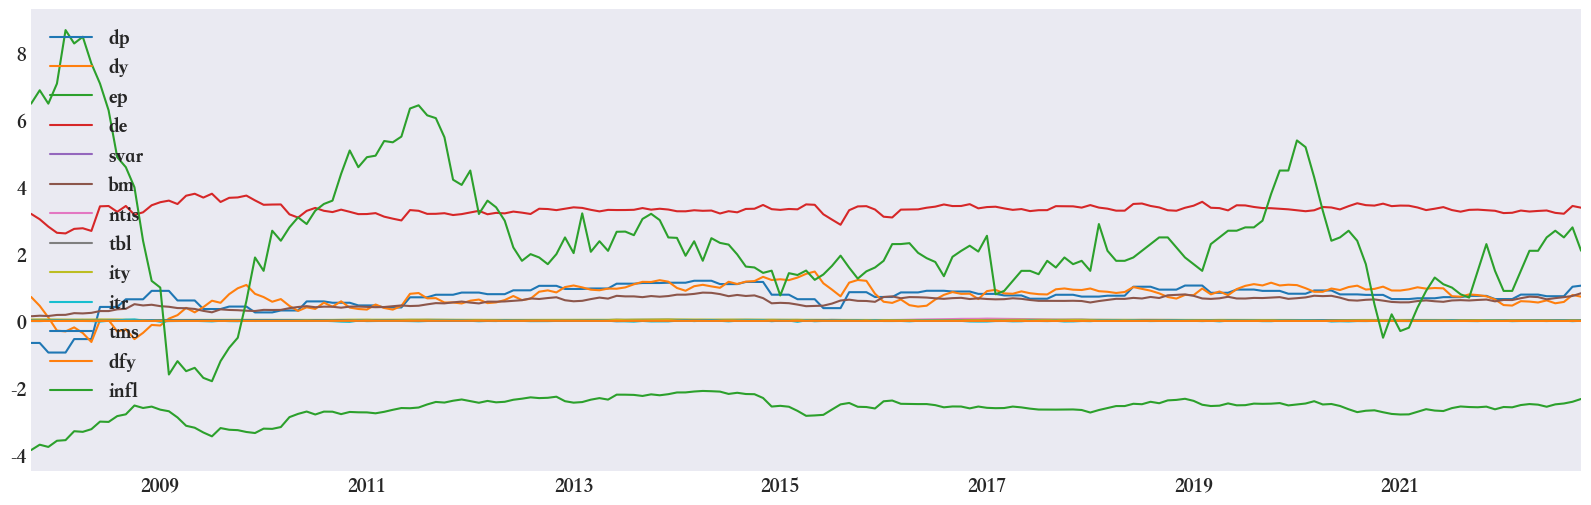

In [340]:
data_macro.dropna().plot(figsize=(20,6))


In [3]:
from datetime import date
today_for_api  = str(date.today())
today_for_api  = str(date.today()-timedelta(days=1))

begin_for_api  = "2005-01-01"

In [4]:
import pandas as pd
data_code = pd.read_excel("/Users/xinyuexu/Public/multi_strategy/wind金融数据.xlsx",sheet_name="WSD_数据字段")
data_code = data_code.query("类型=='风格'")
name= data_code[["代码","名称"]].set_index("代码").to_dict()
str_code_=""
for i,j in enumerate(data_code["代码"]):
        
    if i >0:
        str_code_ = str_code_+","+str(j)
    else:
        str_code_ = str_code_+str(j)
error,df= w.edb(str_code_, begin_for_api, today_for_api, "Fill=Previous",usedf=True);
#error,_data_ = w.wsd(str_code_, "close", "2022-01-01", today_for_api, "PriceAdj=F",usedf=True);
df.index =pd.to_datetime(df.index,infer_datetime_format=True).to_period("D")

df=df.rename(columns=name["名称"])
_data_=df
data_lag_20 = (_data_/_data_.shift(20)-1)*100
data_lag_7 = (_data_/_data_.shift(7)-1)*100
data_lag_126 = (_data_/_data_.shift(126)-1)*100

In [5]:


data= pd.DataFrame(pd.concat([_data_.tail(1),data_lag_7.tail(1),data_lag_20.tail(1),data_lag_126.tail(1)]).T)

data.columns=["现价","本周涨跌幅","近一个月涨跌幅","近半年涨跌幅"]
data.style.background_gradient(cmap=cm).format("{:.2f}", na_rep='MISS')

NameError: name 'cm' is not defined

In [1]:
df_return= np.log(df)-np.log(df.shift(1))

NameError: name 'np' is not defined

<AxesSubplot: >

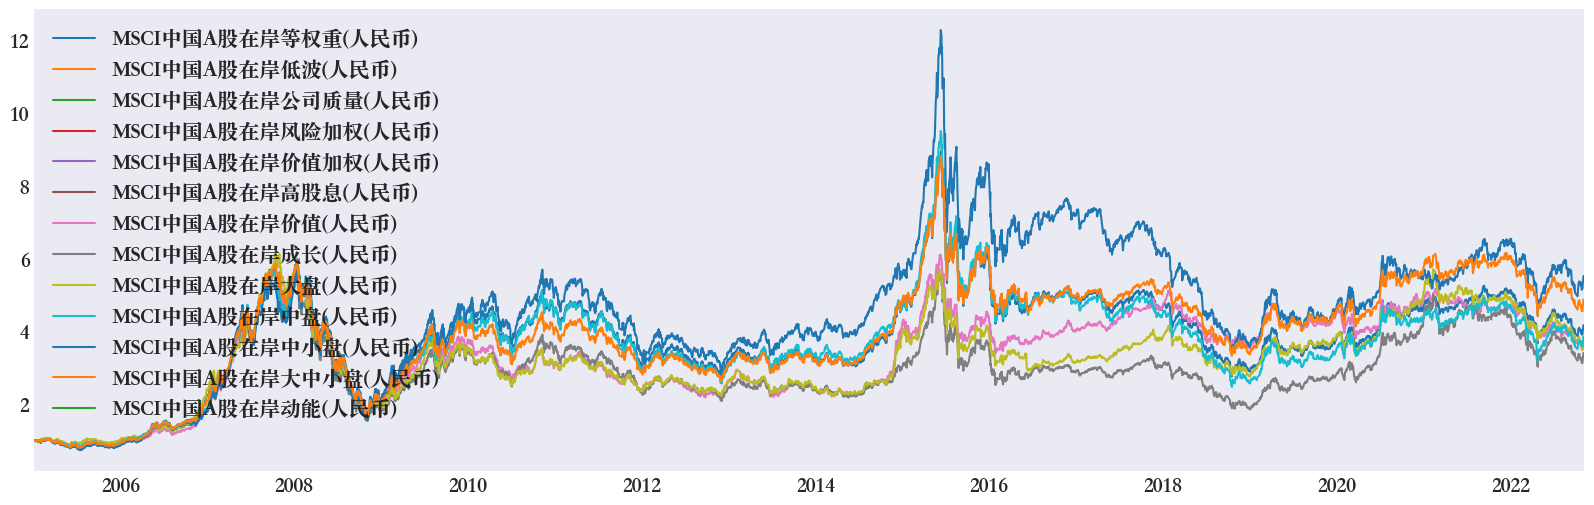

In [95]:
(df/df.iloc[0]).plot(figsize=(20,6))

In [10]:
((df.tail(1)/df.iloc[0])**(252/df.shape[0])-1).T.style.background_gradient(cmap=cm).format("{:.2%}", na_rep='MISS')

In [11]:
df_ret_ratio=df/df.shift(1)-1

In [12]:
def annual_rate_(data):
    data_return_mean =(1+data).prod()**(252/data.shape[0])-1
    data_return_vol = data.std()*np.sqrt(252)
    data_return_sharpe =data_return_mean/data_return_vol
    return data_return_sharpe

In [13]:
df_sharpe = df_ret_ratio.dropna().rolling(window=252*3).apply(annual_rate_)

<AxesSubplot: >

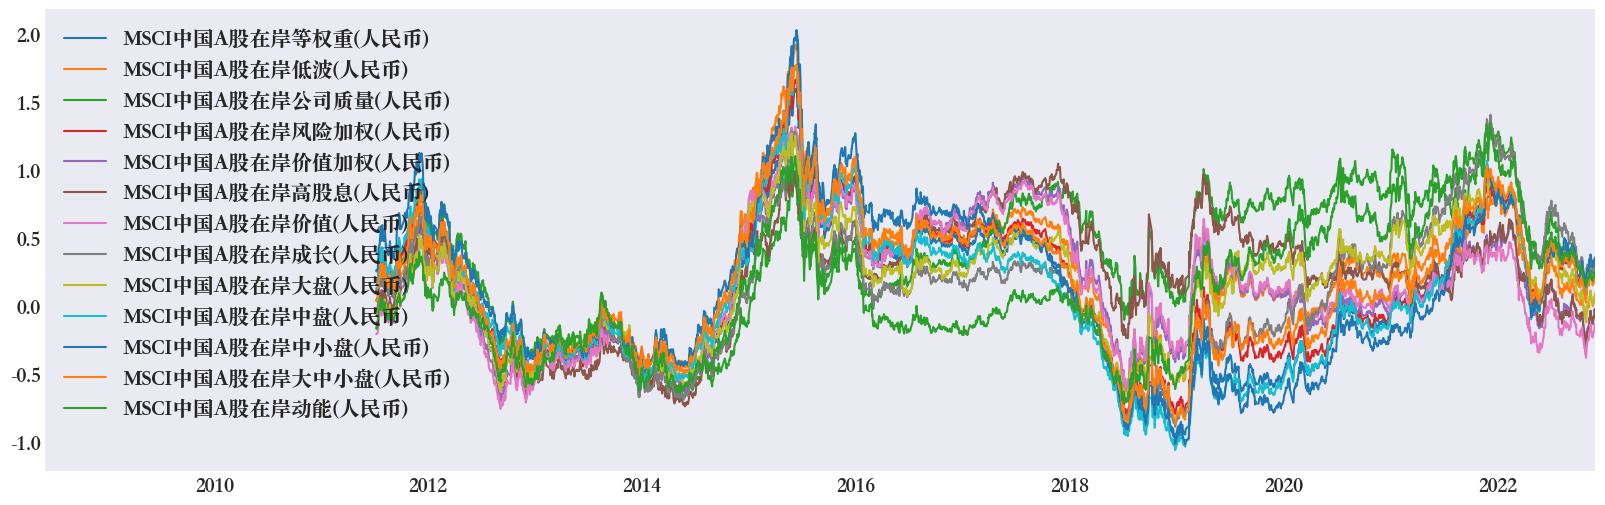

In [14]:
df_sharpe.plot(figsize=(20,6))

In [17]:
annual_rate_(df_ret_ratio.dropna())

MSCI中国A股在岸等权重(人民币)     0.017642
MSCI中国A股在岸低波(人民币)      0.107368
MSCI中国A股在岸公司质量(人民币)    0.176783
MSCI中国A股在岸风险加权(人民币)    0.066207
MSCI中国A股在岸价值加权(人民币)    0.037648
MSCI中国A股在岸高股息(人民币)     0.057133
MSCI中国A股在岸价值(人民币)      0.007240
MSCI中国A股在岸成长(人民币)     -0.006573
MSCI中国A股在岸大盘(人民币)      0.012949
MSCI中国A股在岸中盘(人民币)      0.000043
MSCI中国A股在岸中小盘(人民币)     0.094338
MSCI中国A股在岸大中小盘(人民币)    0.068729
MSCI中国A股在岸动能(人民币)     -0.035544
dtype: float64

In [16]:
data = df_ret_ratio.dropna()
data_return_mean =(1+data).prod()**(252/data.shape[0])-1
data_return_vol = data.std()*np.sqrt(252)
data_return_sharpe =data_return_mean/data_return_vol


# 基于历史数据夏普估计：夏普方法1

越涨夏普越高



<AxesSubplot: >

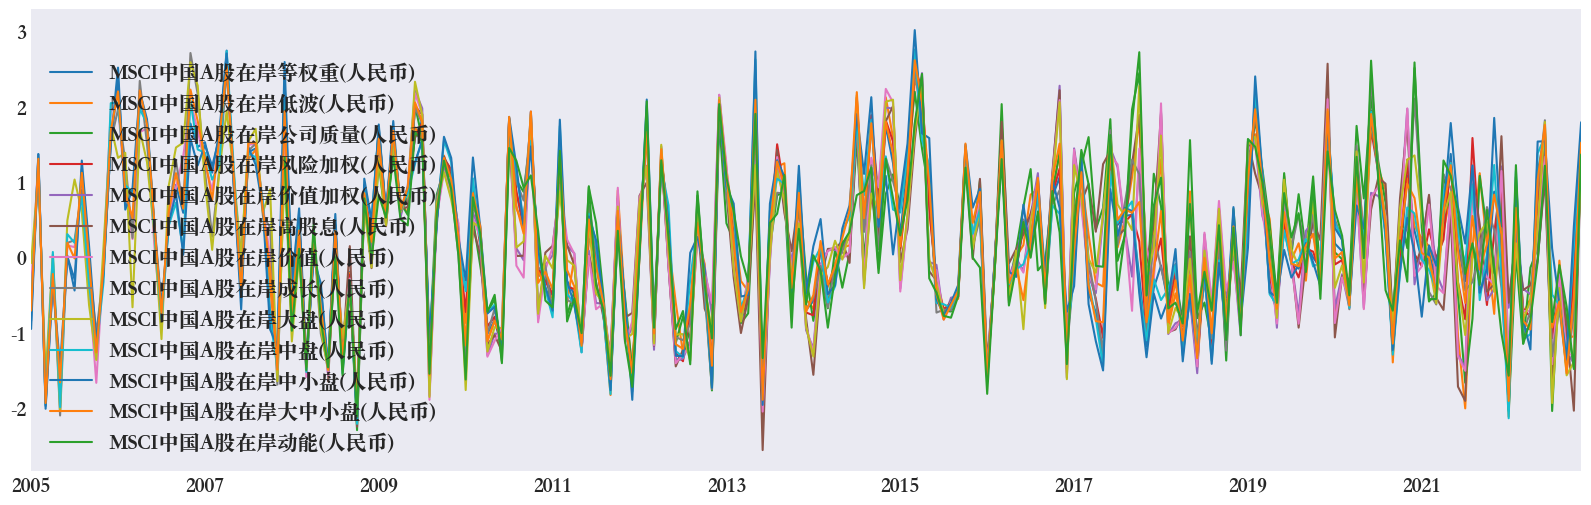

In [334]:
df_sharpe.plot(figsize=(20,6))

# 全样本夏普

In [347]:
data_return_sharpe

MSCI中国A股在岸等权重(人民币)     0.012471
MSCI中国A股在岸低波(人民币)      0.095671
MSCI中国A股在岸公司质量(人民币)    0.167406
MSCI中国A股在岸风险加权(人民币)    0.057829
MSCI中国A股在岸价值加权(人民币)    0.019100
MSCI中国A股在岸高股息(人民币)     0.033557
MSCI中国A股在岸价值(人民币)     -0.009245
MSCI中国A股在岸成长(人民币)     -0.003918
MSCI中国A股在岸大盘(人民币)      0.004472
MSCI中国A股在岸中盘(人民币)     -0.000198
MSCI中国A股在岸中小盘(人民币)     0.093190
MSCI中国A股在岸大中小盘(人民币)    0.063861
MSCI中国A股在岸动能(人民币)     -0.040407
dtype: float64

In [165]:
data_return_sharpe

MSCI中国A股在岸等权重(人民币)     0.012471
MSCI中国A股在岸低波(人民币)      0.095671
MSCI中国A股在岸公司质量(人民币)    0.167406
MSCI中国A股在岸风险加权(人民币)    0.057829
MSCI中国A股在岸价值加权(人民币)    0.019100
MSCI中国A股在岸高股息(人民币)     0.033557
MSCI中国A股在岸价值(人民币)     -0.009245
MSCI中国A股在岸成长(人民币)     -0.003918
MSCI中国A股在岸大盘(人民币)      0.004472
MSCI中国A股在岸中盘(人民币)     -0.000198
MSCI中国A股在岸中小盘(人民币)     0.093190
MSCI中国A股在岸大中小盘(人民币)    0.063861
MSCI中国A股在岸动能(人民币)     -0.040407
dtype: float64

MSCI中国A股在岸等权重(人民币)     0.003343
MSCI中国A股在岸低波(人民币)      0.022689
MSCI中国A股在岸公司质量(人民币)    0.043702
MSCI中国A股在岸风险加权(人民币)    0.014717
MSCI中国A股在岸价值加权(人民币)    0.004644
MSCI中国A股在岸高股息(人民币)     0.008047
MSCI中国A股在岸价值(人民币)     -0.002289
MSCI中国A股在岸成长(人民币)     -0.001065
MSCI中国A股在岸大盘(人民币)      0.001128
MSCI中国A股在岸中盘(人民币)     -0.000055
MSCI中国A股在岸中小盘(人民币)     0.026485
MSCI中国A股在岸大中小盘(人民币)    0.016388
MSCI中国A股在岸动能(人民币)     -0.011210
dtype: float64

# 基于月度数据夏普估计：夏普方法2

Whitelaw（1997）

In [19]:
df_ret_ratio_mean_monthly=df_ret_ratio.resample("M").sum()
df_ret_ratio_std_monthly=np.sqrt((df_ret_ratio**2).resample("M").sum())
df_sharpe =df_ret_ratio_mean_monthly/df_ret_ratio_std_monthly

In [20]:
df_sharpe.mean()

MSCI中国A股在岸等权重(人民币)     0.212063
MSCI中国A股在岸低波(人民币)      0.188324
MSCI中国A股在岸公司质量(人民币)    0.212855
MSCI中国A股在岸风险加权(人民币)    0.161916
MSCI中国A股在岸价值加权(人民币)    0.116616
MSCI中国A股在岸高股息(人民币)     0.142785
MSCI中国A股在岸价值(人民币)      0.179689
MSCI中国A股在岸成长(人民币)      0.216825
MSCI中国A股在岸大盘(人民币)      0.208257
MSCI中国A股在岸中盘(人民币)      0.216553
MSCI中国A股在岸中小盘(人民币)     0.255210
MSCI中国A股在岸大中小盘(人民币)    0.244299
MSCI中国A股在岸动能(人民币)      0.142945
dtype: float64

<AxesSubplot: >

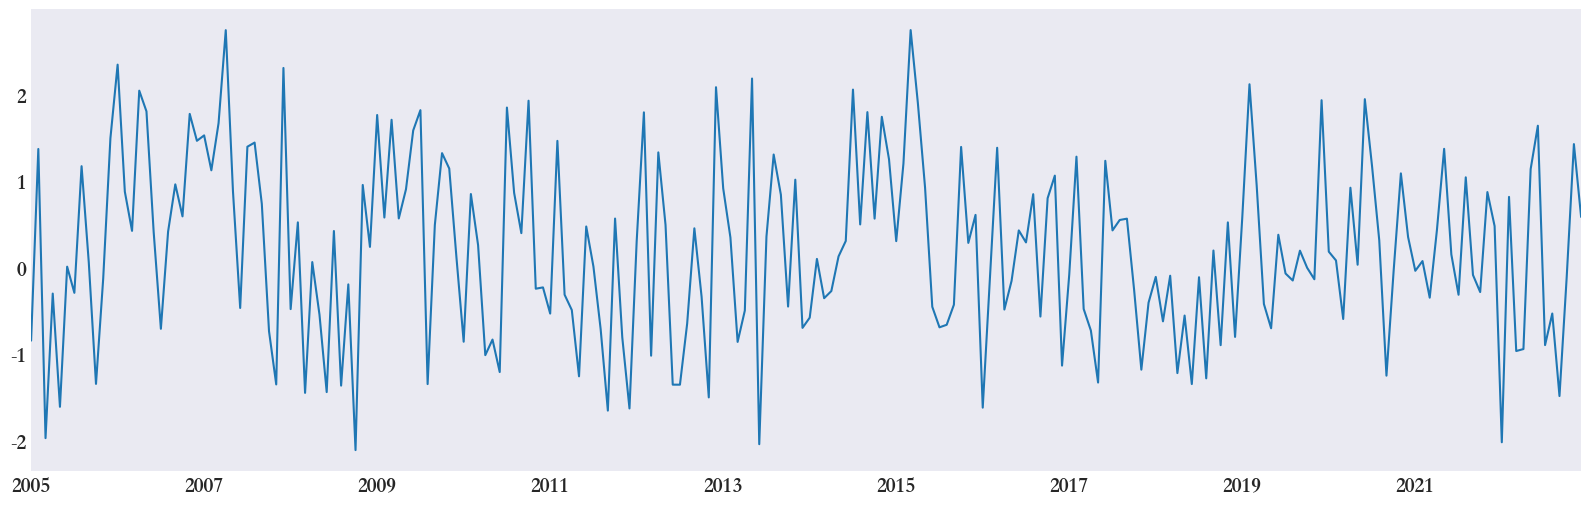

In [21]:
df_sharpe["MSCI中国A股在岸等权重(人民币)"].plot(figsize=(20,6))

In [354]:
#!conda install sklearn
#! pip install cvxpy

In [23]:
sys.path.append("/Users/xinyuexu/Public/multi_asset/macro_and_strategy/")
sys.path.append("/Users/xinyuexu/Public/multi_asset/编程学习/financial_course/finance-courses/course_2_advanced_portfolio_construction_and_analysis_with_python/")
import ml_asset_kit as mla

import edhec_risk_kit as erk

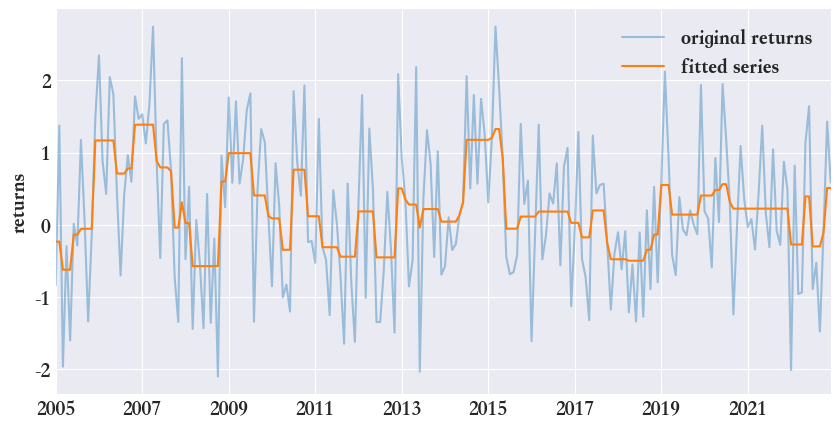

In [24]:

lambda_value = 2

ax = mla.trend_filtering_plot(df_sharpe["MSCI中国A股在岸等权重(人民币)"], lambda_value=lambda_value, figx=10, figy=5)

In [25]:
betas= mla.trend_filtering(df_sharpe["MSCI中国A股在岸等权重(人民币)"].values, lambda_value=lambda_value)

In [27]:
betas = pd.Series(betas, index=df_sharpe.index)


In [28]:
regimelist = mla.regime_switch(betas)


<AxesSubplot: >

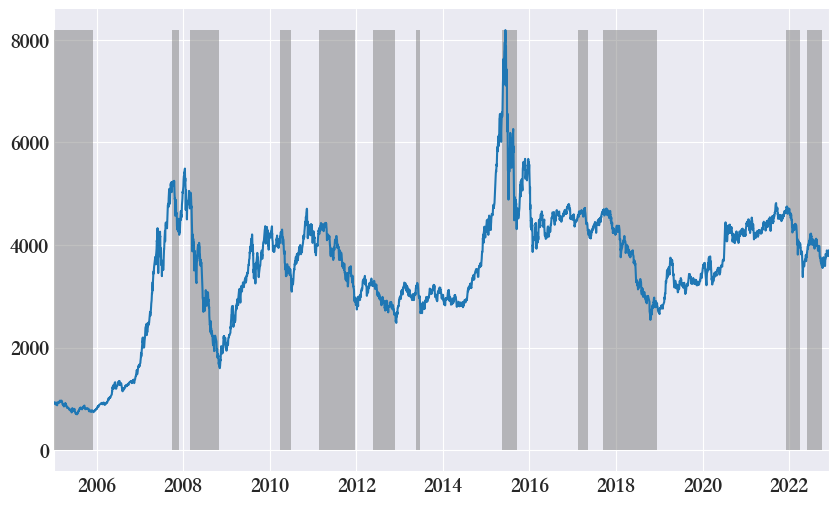

In [29]:
data =df["MSCI中国A股在岸等权重(人民币)"]
curr_reg = np.sign(betas[0]-1e-5)
fig, ax = plt.subplots(1,1,figsize=(10,6))
for i in range(len(regimelist)-1):
    if curr_reg == 1:
        pass
        # uncomment below if we want to color the normal regimes
        #ax.axhspan(0, data.max(), xmin=regimelist[i]/regimelist[-1], xmax=regimelist[i+1]/regimelist[-1], 
         #         facecolor="green", alpha=0.3)
    else:
        ax.axhspan(0, data.max(),  xmin=regimelist[i]/regimelist[-1], xmax=regimelist[i+1]/regimelist[-1], 
                   facecolor='gray', alpha=0.5)
    curr_reg = -1 * curr_reg

data.plot(ax=ax, grid=True)

In [30]:
data_macro_forcast =data_macro.shift(3)

NameError: name 'data_macro' is not defined

In [287]:
data_orignal =df_sharpe["MSCI中国A股在岸等权重(人民币)"]

<AxesSubplot: >

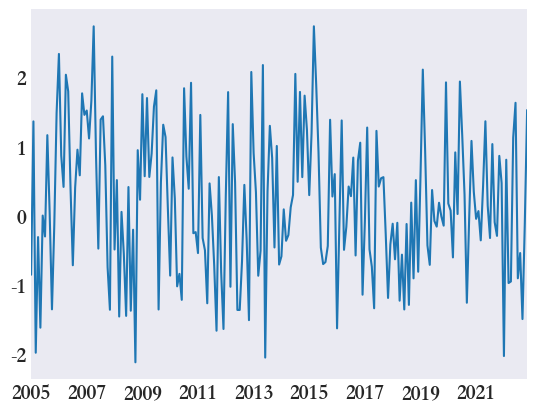

In [238]:
data_orignal.plot()

In [289]:

data_macro_forcast["SSR"] =betas

data_macro_forcast["SR"] =df_sharpe["MSCI中国A股在岸等权重(人民币)"]


In [290]:
data_macro_forcast.dropna()
data_macro_forcast.index=data_macro_forcast.index.to_timestamp()

dp        dy        ep        de      svar        bm      ntis  \
2000-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-04       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000-05       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
2022-07  0.741413  0.530073 -2.492627  3.234040  0.001537  0.684229  0.017247   
2022-08  0.741413  0.570848 -2.466564  3.207978  0.002056  0.713369  0.018812   
2022-09  1.025217  0.778960 -2.415324  3.440541  0.001862  0.749232  0.019040   
2022-10  1.057443  0.728616 -2.330920  3.388363  0.003342  0.830496  0.019470   
2022-11       NaN       NaN -2.379518       NaN  0.002698  0.791077       NaN   

              tbl       ity       itr       tms       dfy  infl  
2000-01       NaN       NaN       NaN       NaN       NaN  -0.2  
2000-02       NaN       NaN       NaN       NaN       NaN   0.7  
2000-03       NaN       NaN       NaN       NaN       NaN  -0.2  
2000-04       NaN       NaN       NaN       NaN       NaN  -0.3  
2000-05       NaN       NaN       NaN       NaN       NaN   0.1  
...           ...       ...       ...       ...       ...   ...  
2022-07  0.014988  0.027560  0.008797  0.012572  0.001426   2.7  
2022-08  0.014704  0.026225  0.011650  0.011521  0.001826   2.5  
2022-09  0.016026  0.027601 -0.005314  0.011575  0.001625   2.8  
2022-10  0.016249  0.026433  0.007440  0.010184  0.002025   2.1  
2022-11  0.017509  0.026953       NaN  0.009444  0.001825   NaN  

[275 rows x 13 columns]

In [291]:
variable_macro=data_macro.columns

In [302]:
data_macro_forcast=data_macro_forcast.dropna()


<AxesSubplot: >

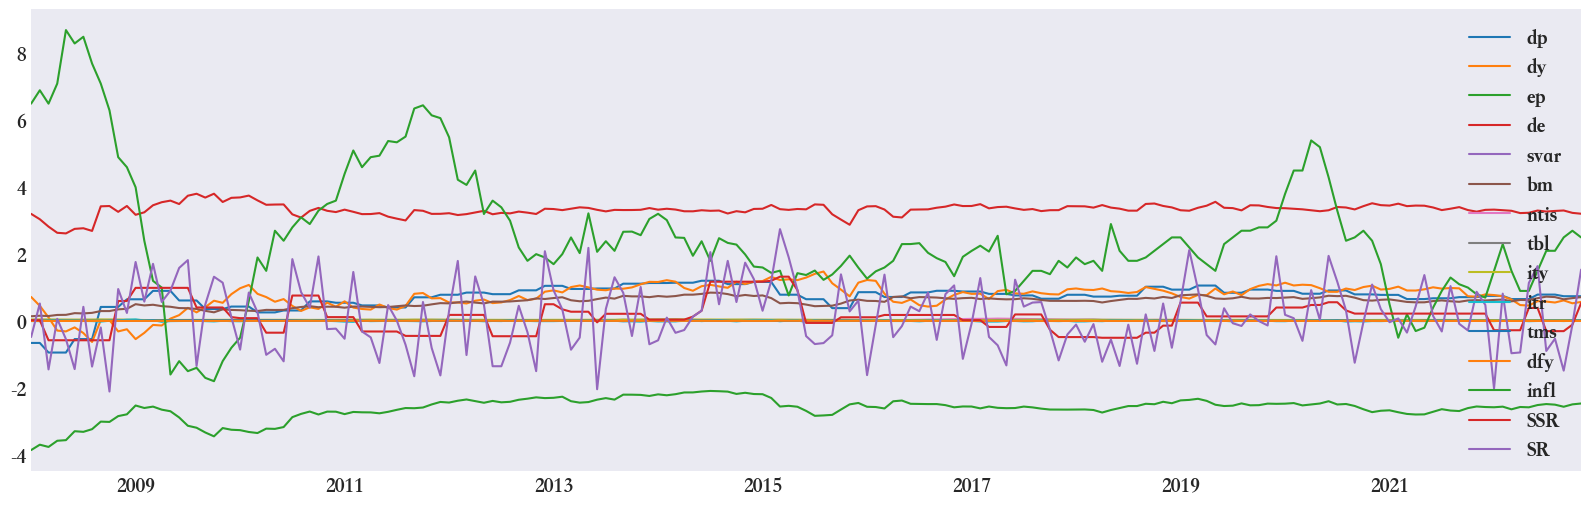

In [336]:
data_macro_forcast.plot(figsize=(20,6))

In [313]:
data_macro_fitted_value =pd.DataFrame(index = data_macro_forcast.index,columns=variable_macro)


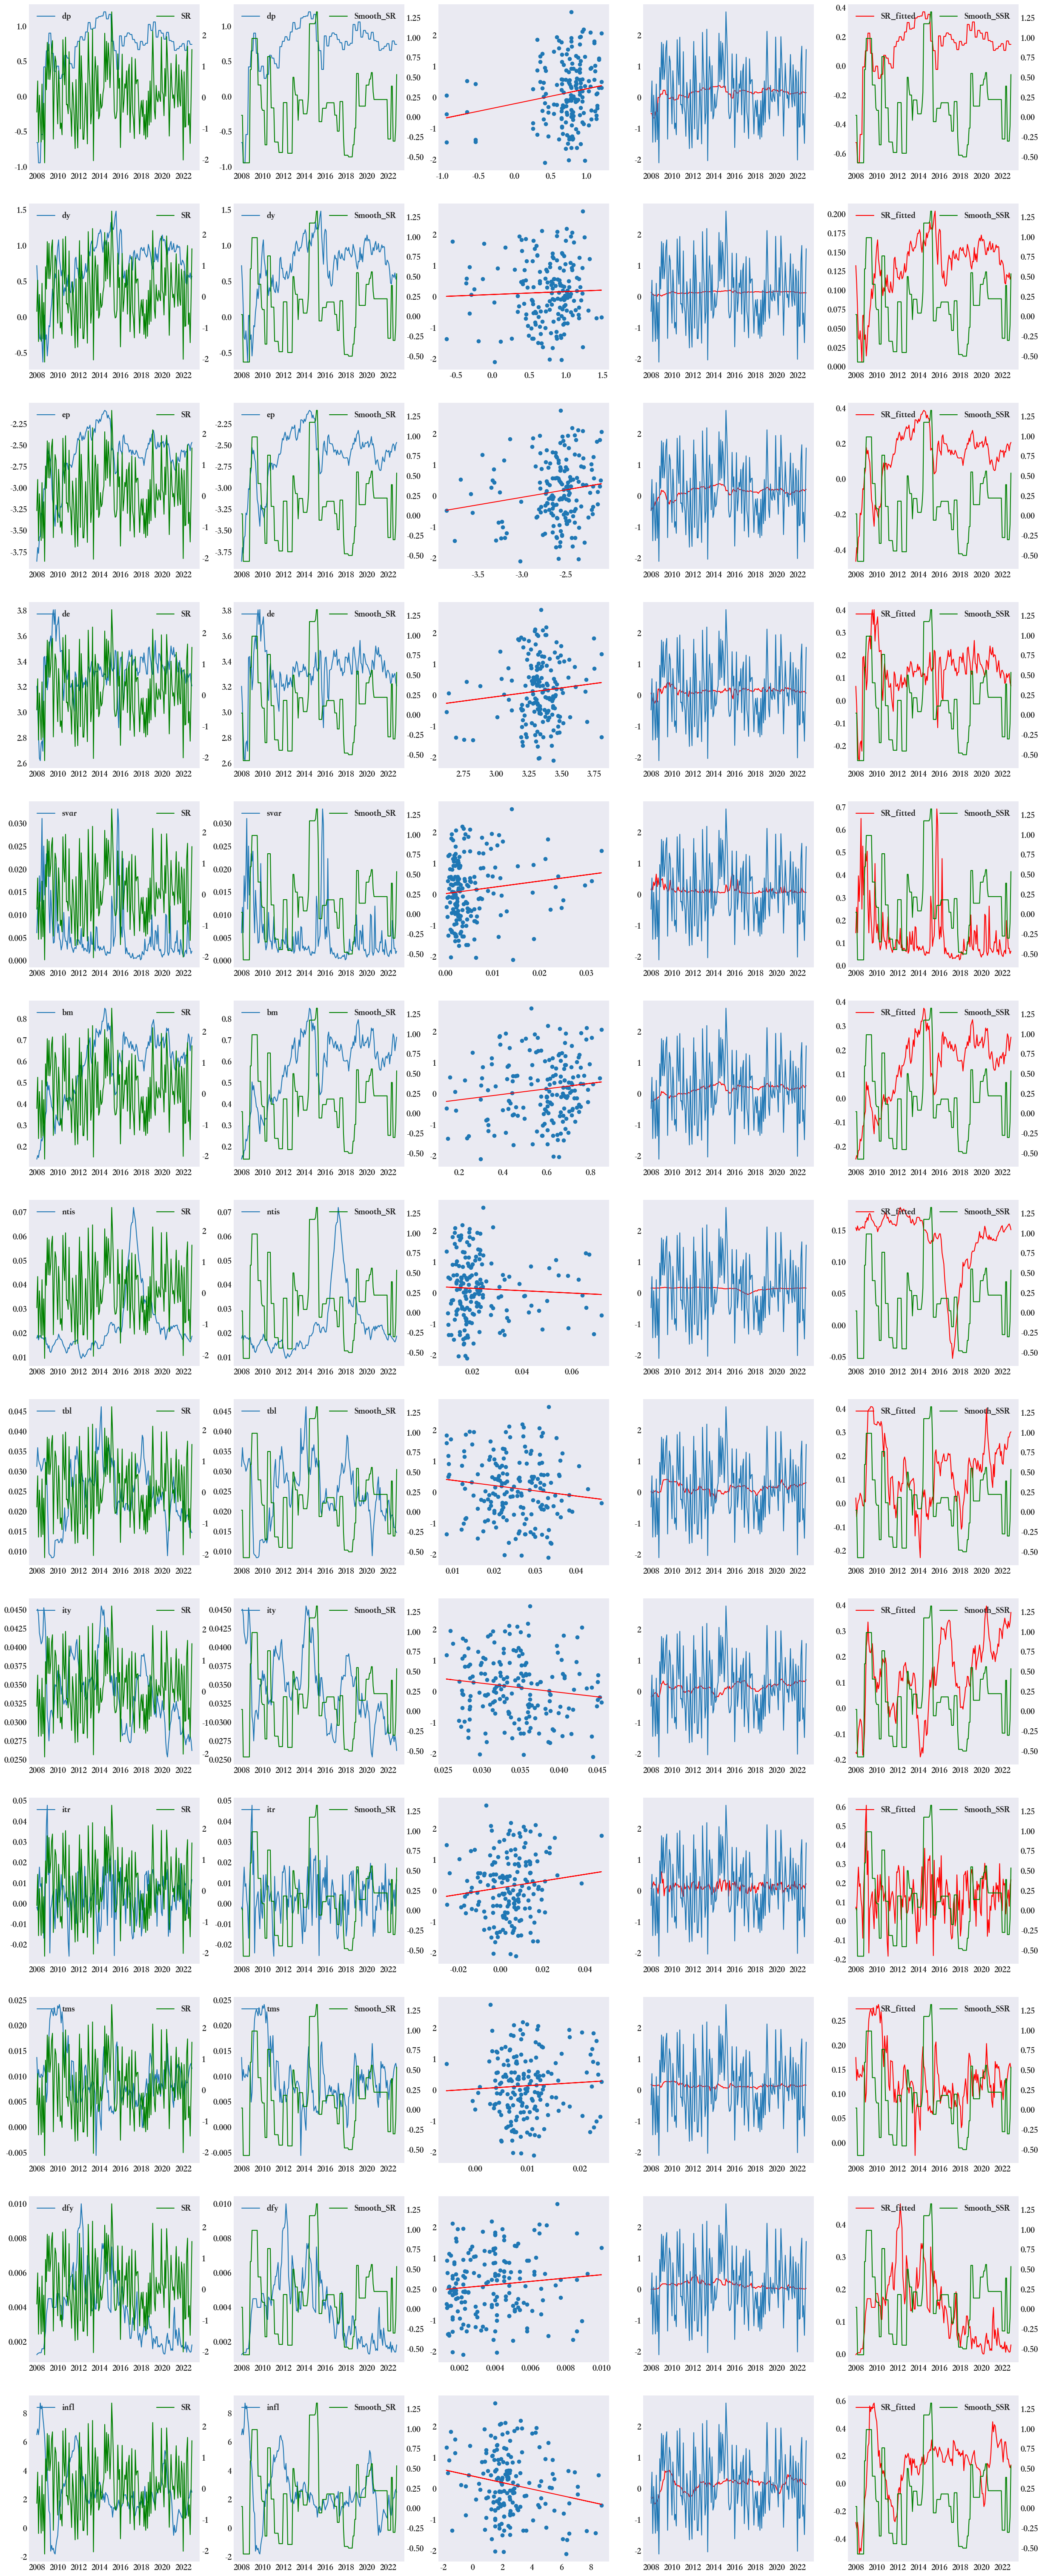

In [346]:
import statsmodels.api as sm
import numpy as np




macro_variable_num=len(variable_macro)
fig, ax = plt.subplots(macro_variable_num,5,figsize=(30,6*macro_variable_num))
for i,j in enumerate(data_macro.columns):
    ax[i,0].plot(data_macro_forcast[j].index,data_macro_forcast[j],label=str(j))
    axy=ax[i,0].twinx()
    axy.plot(data_macro_forcast[j].index,data_macro_forcast["SR"],'g',label="SR")
    axy.legend(loc=1)
    ax[i,0].legend(loc=2)
    ax[i,1].plot(data_macro_forcast[j].index,data_macro_forcast[j],label=str(j))
    axy=ax[i,1].twinx()
    axy.plot(data_macro_forcast[j].index,data_macro_forcast["SSR"],'g',label="Smooth_SR")
    axy.legend(loc=1)
    ax[i,1].legend(loc=2)
    ax[i,2].scatter(data_macro_forcast[j],data_macro_forcast["SR"])
    #duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
    Y = data_macro_forcast["SR"]
    X = data_macro_forcast[j]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    Y_fitted=results.fittedvalues
    ax[i,2].plot(data_macro_forcast[j],Y_fitted,"r")
    ax[i,3].plot(data_macro_forcast[j].index,Y_fitted,"r",label="SR_fitted")
    ax[i,3].plot(data_macro_forcast[j].index,data_macro_forcast["SR"],label="SR_real_values")
    data_macro_fitted_value[j]=Y_fitted
    ax[i,4].plot(data_macro_forcast[j].index,Y_fitted,"r",label="SR_fitted")
    ax[i,4].legend(loc=2)
    axy=ax[i,4].twinx()
    axy.plot(data_macro_forcast[j].index,data_macro_forcast["SSR"],"g",label="Smooth_SSR")
    axy.legend(loc=1)
    data_macro_fitted_value[j]=Y_fitted

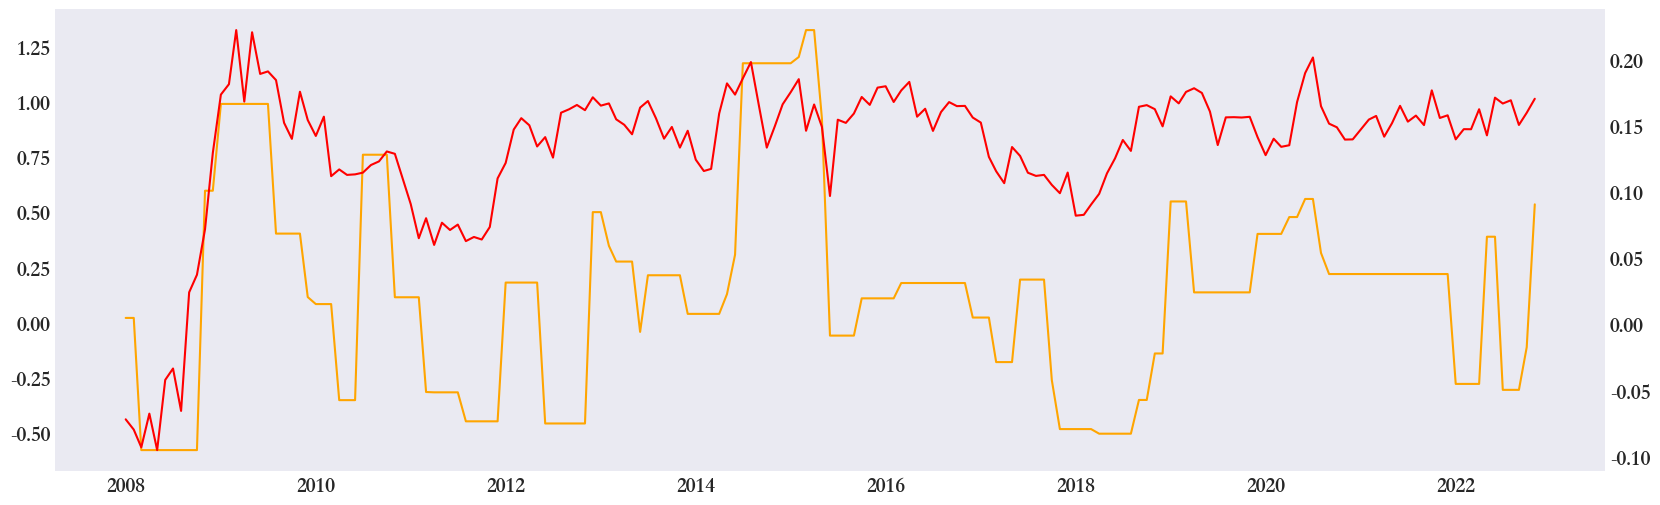

In [327]:
fig, ax = plt.subplots(1,1,figsize=(20,6))
ax.plot(data_macro_forcast[j].index,data_macro_forcast["SSR"],"orange",label="SR_real_values")
axy=ax.twinx()

axy.plot(data_macro_forcast[j].index,data_macro_fitted_value.mean(axis=1),"r",label="SR_real_values")
      


NameError: name 'data_macro' is not defined

In [6]:
data_macro_forcast

NameError: name 'data_macro_forcast' is not defined